# Co2 Emission

## Pre processing

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [2]:
emission_data=pd.read_csv('co2_emissions (1).csv', sep=';')
emission_data.head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


# Preprocessing the Data

### 3. Removing Duplicate Values

In [3]:
# Coverting string features to lower case
emission_data=emission_data.applymap(lambda x:x.lower() if type(x)==str else x)
emission_data.head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244
5,acura,rlx,mid-size,3.5,6,as,z,11.9,7.7,10.0,28,230
6,acura,tl,mid-size,3.5,6,as,z,11.8,8.1,10.1,28,232
7,acura,tl awd,mid-size,3.7,6,as,z,12.8,9.0,11.1,25,255
8,acura,tl awd,mid-size,3.7,6,m,z,13.4,9.5,11.6,24,267
9,acura,tsx,compact,2.4,4,as,z,10.6,7.5,9.2,31,212


In [4]:
emission_data.duplicated().sum()

1404

In [5]:
# Entries which are duplicated
emission_data[emission_data.duplicated()].head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244
1076,acura,rlx,mid-size,3.5,6,as,z,11.9,7.7,10.0,28,230
1081,alfa romeo,4c,two-seater,1.8,4,am,z,9.7,6.9,8.4,34,193
1082,aston martin,db9,minicompact,5.9,12,a,z,18.0,12.6,15.6,18,359
1084,aston martin,v8 vantage,two-seater,4.7,8,am,z,17.4,11.3,14.7,19,338


In [6]:
# Dropping duplicates
emission_data.drop_duplicates(inplace=True)

In [7]:
emission_data.duplicated().sum()

0

In [8]:
emission_data.shape

(5981, 12)

## 4. Detecting and Removing Outliers

#### For Feature:  engine_size

In [9]:
emission_data[['engine_size']].head()

,engine_size
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


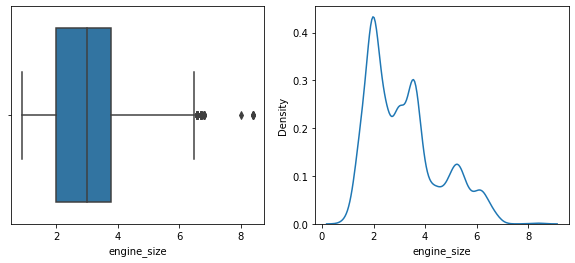

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_data['engine_size'])
plt.subplot(1,2,2)
sns.distplot(emission_data['engine_size'], hist=False)
plt.show()

### Detecting using IQR based Filtering

**Tukey Fences**

There are several methods for determining outliers in a sample. A very popular method is based on the following:
- Outliers are values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1) or equivalently, values below Q1-1.5 IQR or above Q3+1.5 IQR.

In [11]:
# Finding first and third quantile
first_quantile=emission_data['engine_size'].quantile(0.25)
print('First Quantile:', first_quantile)
third_quantile=emission_data['engine_size'].quantile(0.75)
print('Third Quantile:', third_quantile)
iqr=third_quantile-first_quantile
print('Inter-Quantile Range:', round(iqr,2))

First Quantile: 2.0
Third Quantile: 3.8
Inter-Quantile Range: 1.8


In [12]:
# finding upper and lower limits
upper_limit = third_quantile + 1.5 * iqr
print('Upper Limit:', upper_limit)
lower_limit = first_quantile - 1.5 * iqr
print('Lower Limit:', lower_limit)

Upper Limit: 6.5
Lower Limit: -0.6999999999999997


#### Finding Outliers

In [13]:
emission_data[emission_data['engine_size']>upper_limit].head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
75,bentley,mulsanne,mid-size,6.8,8,as,z,22.3,14.9,19.0,15,437
349,ford,e350 wagon,van - passenger,6.8,10,a,x,23.9,17.8,21.2,13,488
927,rolls-royce,ghost,full-size,6.6,12,a,z,19.1,12.3,16.0,18,368
928,rolls-royce,ghost ewb,full-size,6.6,12,a,z,19.1,12.3,16.0,18,368
929,rolls-royce,phantom,full-size,6.7,12,a,z,20.7,12.8,17.1,17,393
930,rolls-royce,phantom coupe,compact,6.7,12,a,z,20.7,12.8,17.1,17,393
931,rolls-royce,phantom drophead coupe,compact,6.7,12,a,z,20.7,12.7,17.1,17,393
932,rolls-royce,phantom ewb,full-size,6.7,12,a,z,20.7,12.7,17.1,17,393
933,rolls-royce,wraith,mid-size,6.6,12,a,z,18.7,11.8,15.6,18,359
945,srt,viper coupe,two-seater,8.4,10,m,z,20.0,13.0,16.9,17,389


In [14]:
print('Number of Outliers which are above the upprer limit is',sum(emission_data['engine_size']>upper_limit))

Number of Outliers which are above the upprer limit is 61


In [15]:
emission_data[emission_data['engine_size']<lower_limit]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [16]:
print('Number of Outliers which are above the lower limit is',sum(emission_data['engine_size']<lower_limit))

Number of Outliers which are above the lower limit is 0


#### Trimming

In [17]:
trimmed_data=emission_data[emission_data['engine_size']<=upper_limit]
trimmed_data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244


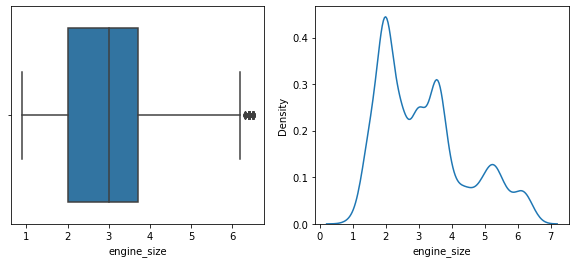

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(trimmed_data['engine_size'])
plt.subplot(1,2,2)
sns.distplot(trimmed_data['engine_size'], hist=False)
plt.show()

#### Caping/ Flooring

In [19]:
emission_dataset = emission_data.copy()
emission_dataset['engine_size'] = np.where(emission_dataset['engine_size'] > upper_limit,
                                      upper_limit,
                                      np.where(emission_dataset['engine_size'] < lower_limit,
                                               lower_limit,
                                               emission_dataset['engine_size']
                                              )
                                     )
emission_dataset.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244


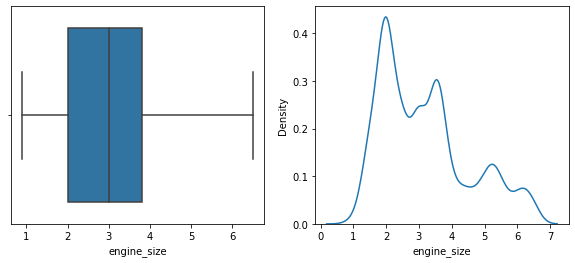

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_dataset['engine_size'])
plt.subplot(1,2,2)
sns.distplot(emission_dataset['engine_size'], hist=False)
plt.show()

#### For Feature:  fuel_consumption_city

In [21]:
emission_data[['fuel_consumption_city']].head()

,fuel_consumption_city
0,9.9
1,11.2
2,6.0
3,12.7
4,12.1


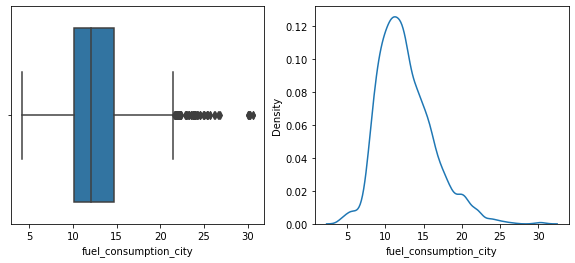

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_data['fuel_consumption_city'])
plt.subplot(1,2,2)
sns.distplot(emission_data['fuel_consumption_city'], hist=False)
plt.show()

In [23]:
# Finding first and third quantile
first_quantile=emission_data['fuel_consumption_city'].quantile(0.25)
print('First Quantile:', first_quantile)
third_quantile=emission_data['fuel_consumption_city'].quantile(0.75)
print('Third Quantile:', third_quantile)
iqr=third_quantile-first_quantile
print('Inter-Quantile Range:', round(iqr,2))

First Quantile: 10.1
Third Quantile: 14.7
Inter-Quantile Range: 4.6


In [24]:
# finding upper and lower limits
upper_limit = third_quantile + 1.5 * iqr
print('Upper Limit:', upper_limit)
lower_limit = first_quantile - 1.5 * iqr
print('Lower Limit:', lower_limit)

Upper Limit: 21.599999999999998
Lower Limit: 3.2


#### Finding Outliers

In [25]:
emission_data[emission_data['fuel_consumption_city']>upper_limit].head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
75,bentley,mulsanne,mid-size,6.8,8,as,z,22.3,14.9,19.0,15,437
180,cadillac,escalade awd,suv - standard,6.2,8,a,e,23.3,16.1,20.1,14,322
182,cadillac,escalade esv awd,suv - standard,6.2,8,a,e,25.7,17.8,22.1,13,354
212,chevrolet,express 1500 cargo,van - cargo,5.3,8,a,e,23.5,17.7,20.9,14,334
214,chevrolet,express 1500 cargo awd,van - cargo,5.3,8,a,e,23.7,18.8,21.5,13,344
216,chevrolet,express 1500 cargo conv,van - cargo,5.3,8,a,e,23.9,18.5,21.5,13,344
218,chevrolet,express 1500 cargo conv awd,van - cargo,5.3,8,a,e,25.3,19.3,22.6,12,362
220,chevrolet,express 1500 passenger,van - passenger,5.3,8,a,e,23.9,18.5,21.5,13,344
222,chevrolet,express 1500 passenger awd,van - passenger,5.3,8,a,e,25.3,19.3,22.6,12,362
224,chevrolet,express 2500 passenger,van - passenger,6.0,8,a,x,21.9,15.0,18.8,15,432


In [26]:
print('Number of Outliers which are above the upprer limit is',sum(emission_data['fuel_consumption_city']>upper_limit))

Number of Outliers which are above the upprer limit is 115


In [27]:
emission_data[emission_data['fuel_consumption_city']<lower_limit]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [28]:
print('Number of Outliers which are above the lower limit is',sum(emission_data['fuel_consumption_city']<lower_limit))

Number of Outliers which are above the lower limit is 0


#### Trimming

In [29]:
trimmed_data=emission_data[emission_data['fuel_consumption_city']<=upper_limit]
trimmed_data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244


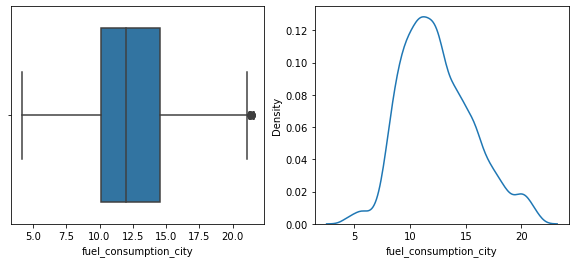

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(trimmed_data['fuel_consumption_city'])
plt.subplot(1,2,2)
sns.distplot(trimmed_data['fuel_consumption_city'], hist=False)
plt.show()

#### Caping/ Flooring

In [31]:
emission_dataset['fuel_consumption_city'] = np.where(emission_dataset['fuel_consumption_city'] > upper_limit,
                                      upper_limit,
                                      np.where(emission_dataset['fuel_consumption_city'] < lower_limit,
                                               lower_limit,
                                               emission_dataset['fuel_consumption_city']
                                              )
                                     )
emission_dataset.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244


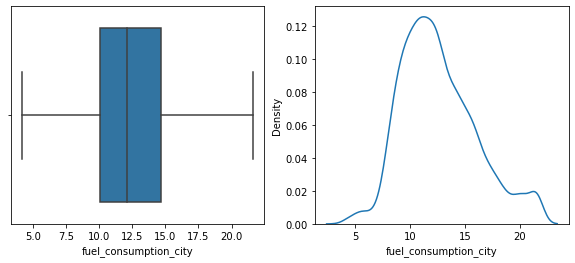

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_dataset['fuel_consumption_city'])
plt.subplot(1,2,2)
sns.distplot(emission_dataset['fuel_consumption_city'], hist=False)
plt.show()

#### For Feature:  fuel_consumption_hwy

In [33]:
emission_data[['fuel_consumption_hwy']].head()

,fuel_consumption_hwy
0,6.7
1,7.7
2,5.8
3,9.1
4,8.7


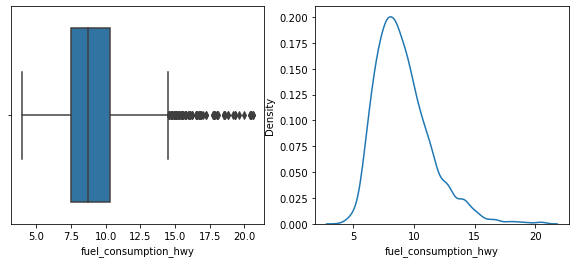

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_data['fuel_consumption_hwy'])
plt.subplot(1,2,2)
sns.distplot(emission_data['fuel_consumption_hwy'], hist=False)
plt.show()

In [35]:
# Finding first and third quantile
first_quantile=emission_data['fuel_consumption_hwy'].quantile(0.25)
print('First Quantile:', first_quantile)
third_quantile=emission_data['fuel_consumption_hwy'].quantile(0.75)
print('Third Quantile:', third_quantile)
iqr=third_quantile-first_quantile
print('Inter-Quantile Range:', round(iqr,2))

First Quantile: 7.5
Third Quantile: 10.3
Inter-Quantile Range: 2.8


In [36]:
# finding upper and lower limits
upper_limit = third_quantile + 1.5 * iqr
print('Upper Limit:', upper_limit)
lower_limit = first_quantile - 1.5 * iqr
print('Lower Limit:', lower_limit)

Upper Limit: 14.500000000000002
Lower Limit: 3.299999999999999


#### Finding Outliers

In [37]:
emission_data[emission_data['fuel_consumption_hwy']>upper_limit].head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
75,bentley,mulsanne,mid-size,6.8,8,as,z,22.3,14.9,19.0,15,437
180,cadillac,escalade awd,suv - standard,6.2,8,a,e,23.3,16.1,20.1,14,322
182,cadillac,escalade esv awd,suv - standard,6.2,8,a,e,25.7,17.8,22.1,13,354
212,chevrolet,express 1500 cargo,van - cargo,5.3,8,a,e,23.5,17.7,20.9,14,334
214,chevrolet,express 1500 cargo awd,van - cargo,5.3,8,a,e,23.7,18.8,21.5,13,344
216,chevrolet,express 1500 cargo conv,van - cargo,5.3,8,a,e,23.9,18.5,21.5,13,344
218,chevrolet,express 1500 cargo conv awd,van - cargo,5.3,8,a,e,25.3,19.3,22.6,12,362
220,chevrolet,express 1500 passenger,van - passenger,5.3,8,a,e,23.9,18.5,21.5,13,344
222,chevrolet,express 1500 passenger awd,van - passenger,5.3,8,a,e,25.3,19.3,22.6,12,362
224,chevrolet,express 2500 passenger,van - passenger,6.0,8,a,x,21.9,15.0,18.8,15,432


In [38]:
print('Number of Outliers which are above the upprer limit is',sum(emission_data['fuel_consumption_hwy']>upper_limit))

Number of Outliers which are above the upprer limit is 149


In [39]:
emission_data[emission_data['fuel_consumption_hwy']<lower_limit]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [40]:
print('Number of Outliers which are above the lower limit is',sum(emission_data['fuel_consumption_hwy']<lower_limit))

Number of Outliers which are above the lower limit is 0


#### Trimming

In [41]:
trimmed_data=emission_data[emission_data['fuel_consumption_hwy']<=upper_limit]
trimmed_data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244


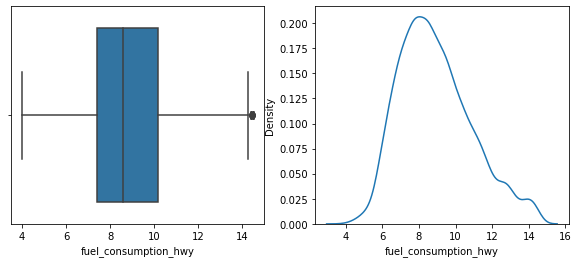

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(trimmed_data['fuel_consumption_hwy'])
plt.subplot(1,2,2)
sns.distplot(trimmed_data['fuel_consumption_hwy'], hist=False)
plt.show()

#### Caping/ Flooring

In [43]:
emission_dataset['fuel_consumption_hwy'] = np.where(emission_dataset['fuel_consumption_hwy'] > upper_limit,
                                      upper_limit,
                                      np.where(emission_dataset['fuel_consumption_hwy'] < lower_limit,
                                               lower_limit,
                                               emission_dataset['fuel_consumption_hwy']
                                              )
                                     )
emission_dataset.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244


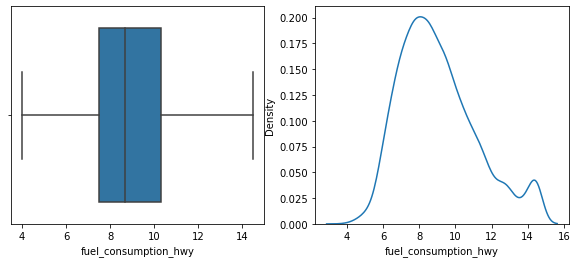

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_dataset['fuel_consumption_hwy'])
plt.subplot(1,2,2)
sns.distplot(emission_dataset['fuel_consumption_hwy'], hist=False)
plt.show()

#### For Feature:  fuel_consumption_comb(l/100km)

In [45]:
emission_data[['fuel_consumption_comb(l/100km)']].head()

,fuel_consumption_comb(l/100km)
0,8.5
1,9.6
2,5.9
3,11.1
4,10.6


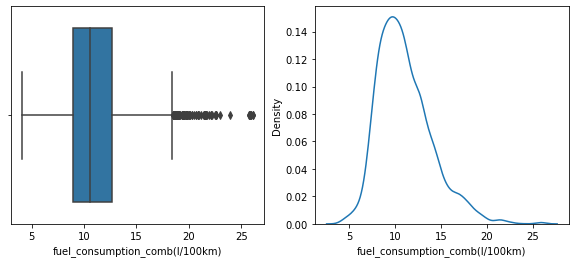

In [46]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_data['fuel_consumption_comb(l/100km)'])
plt.subplot(1,2,2)
sns.distplot(emission_data['fuel_consumption_comb(l/100km)'], hist=False)
plt.show()

In [47]:
# Finding first and third quantile
first_quantile=emission_data['fuel_consumption_comb(l/100km)'].quantile(0.25)
print('First Quantile:', first_quantile)
third_quantile=emission_data['fuel_consumption_comb(l/100km)'].quantile(0.75)
print('Third Quantile:', third_quantile)
iqr=third_quantile-first_quantile
print('Inter-Quantile Range:', round(iqr,2))

First Quantile: 8.9
Third Quantile: 12.7
Inter-Quantile Range: 3.8


In [48]:
# finding upper and lower limits
upper_limit = third_quantile + 1.5 * iqr
print('Upper Limit:', upper_limit)
lower_limit = first_quantile - 1.5 * iqr
print('Lower Limit:', lower_limit)

Upper Limit: 18.4
Lower Limit: 3.200000000000002


#### Finding Outliers

In [49]:
emission_data[emission_data['fuel_consumption_comb(l/100km)']>upper_limit].head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
75,bentley,mulsanne,mid-size,6.8,8,as,z,22.3,14.9,19.0,15,437
180,cadillac,escalade awd,suv - standard,6.2,8,a,e,23.3,16.1,20.1,14,322
182,cadillac,escalade esv awd,suv - standard,6.2,8,a,e,25.7,17.8,22.1,13,354
212,chevrolet,express 1500 cargo,van - cargo,5.3,8,a,e,23.5,17.7,20.9,14,334
214,chevrolet,express 1500 cargo awd,van - cargo,5.3,8,a,e,23.7,18.8,21.5,13,344
216,chevrolet,express 1500 cargo conv,van - cargo,5.3,8,a,e,23.9,18.5,21.5,13,344
218,chevrolet,express 1500 cargo conv awd,van - cargo,5.3,8,a,e,25.3,19.3,22.6,12,362
220,chevrolet,express 1500 passenger,van - passenger,5.3,8,a,e,23.9,18.5,21.5,13,344
222,chevrolet,express 1500 passenger awd,van - passenger,5.3,8,a,e,25.3,19.3,22.6,12,362
224,chevrolet,express 2500 passenger,van - passenger,6.0,8,a,x,21.9,15.0,18.8,15,432


In [50]:
print('Number of Outliers which are above the upprer limit is',sum(emission_data['fuel_consumption_comb(l/100km)']>upper_limit))

Number of Outliers which are above the upprer limit is 114


In [51]:
emission_data[emission_data['fuel_consumption_comb(l/100km)']<lower_limit]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [52]:
print('Number of Outliers which are above the lower limit is',sum(emission_data['fuel_consumption_comb(l/100km)']<lower_limit))

Number of Outliers which are above the lower limit is 0


#### Trimming

In [53]:
trimmed_data=emission_data[emission_data['fuel_consumption_comb(l/100km)']<=upper_limit]
trimmed_data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244


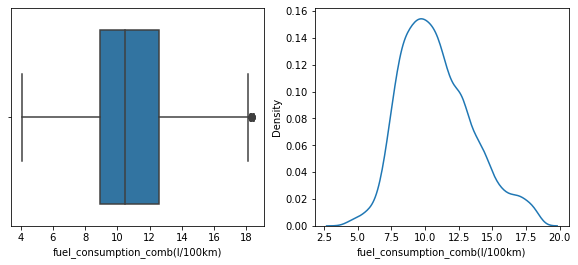

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(trimmed_data['fuel_consumption_comb(l/100km)'])
plt.subplot(1,2,2)
sns.distplot(trimmed_data['fuel_consumption_comb(l/100km)'], hist=False)
plt.show()

#### Caping/ Flooring

In [55]:
emission_dataset['fuel_consumption_comb(l/100km)'] = np.where(emission_dataset['fuel_consumption_comb(l/100km)'] > upper_limit,
                                      upper_limit,
                                      np.where(emission_dataset['fuel_consumption_comb(l/100km)'] < lower_limit,
                                               lower_limit,
                                               emission_dataset['fuel_consumption_comb(l/100km)']
                                              )
                                     )
emission_dataset.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244


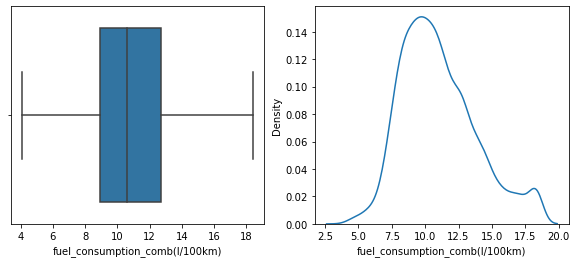

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_dataset['fuel_consumption_comb(l/100km)'])
plt.subplot(1,2,2)
sns.distplot(emission_dataset['fuel_consumption_comb(l/100km)'], hist=False)
plt.show()

#### For Feature: fuel_consumption_comb(mpg) 

In [57]:
emission_data[['fuel_consumption_comb(mpg)']].head()

,fuel_consumption_comb(mpg)
0,33
1,29
2,48
3,25
4,27


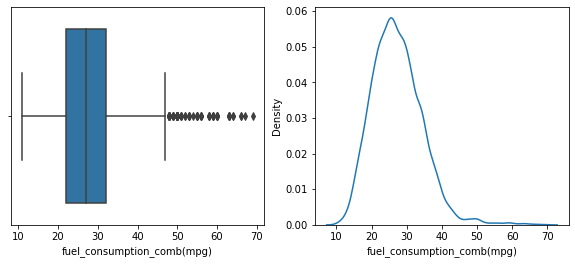

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_data['fuel_consumption_comb(mpg)'])
plt.subplot(1,2,2)
sns.distplot(emission_data['fuel_consumption_comb(mpg)'], hist=False)
plt.show()

In [59]:
# Finding first and third quantile
first_quantile=emission_data['fuel_consumption_comb(mpg)'].quantile(0.25)
print('First Quantile:', first_quantile)
third_quantile=emission_data['fuel_consumption_comb(mpg)'].quantile(0.75)
print('Third Quantile:', third_quantile)
iqr=third_quantile-first_quantile
print('Inter-Quantile Range:', round(iqr,2))

First Quantile: 22.0
Third Quantile: 32.0
Inter-Quantile Range: 10.0


In [60]:
# finding upper and lower limits
upper_limit = third_quantile + 1.5 * iqr
print('Upper Limit:', upper_limit)
lower_limit = first_quantile - 1.5 * iqr
print('Lower Limit:', lower_limit)

Upper Limit: 47.0
Lower Limit: 7.0


#### Finding Outliers

In [61]:
emission_data[emission_data['fuel_consumption_comb(mpg)']>upper_limit].head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
415,ford,fusion hybrid,mid-size,2.0,4,av,x,5.3,5.7,5.5,51,126
487,honda,accord hybrid,mid-size,2.0,4,av,x,4.7,4.9,4.8,59,110
659,lexus,ct 200h,compact,1.8,4,av,x,5.5,5.8,5.6,50,129
975,toyota,camry hybrid le,mid-size,2.5,4,av,x,5.5,5.9,5.7,50,131
992,toyota,prius,mid-size,1.8,4,av,x,4.7,4.9,4.8,59,110
993,toyota,prius c,compact,1.5,4,av,x,4.6,4.9,4.7,60,108
994,toyota,prius v,station wagon - mid-size,1.8,4,av,x,5.3,5.8,5.5,51,126
1047,volkswagen,jetta turbo hybrid,compact,1.4,4,am,z,5.6,5.2,5.4,52,124
1498,ford,fusion hybrid,mid-size,2.0,4,av,x,5.4,5.8,5.5,51,126


In [62]:
print('Number of Outliers which are above the upprer limit is',sum(emission_data['fuel_consumption_comb(mpg)']>upper_limit))

Number of Outliers which are above the upprer limit is 80


In [63]:
emission_data[emission_data['fuel_consumption_comb(mpg)']<lower_limit]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [64]:
print('Number of Outliers which are above the lower limit is',sum(emission_data['fuel_consumption_comb(mpg)']<lower_limit))

Number of Outliers which are above the lower limit is 0


#### Trimming

In [65]:
trimmed_data=emission_data[emission_data['fuel_consumption_comb(mpg)']<=upper_limit]
trimmed_data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244
5,acura,rlx,mid-size,3.5,6,as,z,11.9,7.7,10.0,28,230


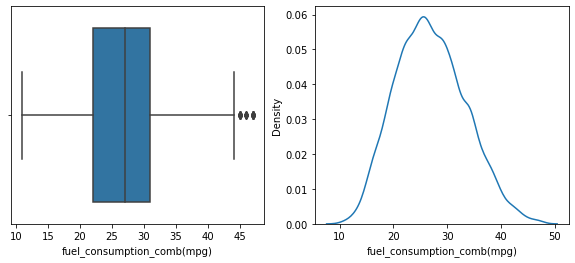

In [66]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(trimmed_data['fuel_consumption_comb(mpg)'])
plt.subplot(1,2,2)
sns.distplot(trimmed_data['fuel_consumption_comb(mpg)'], hist=False)
plt.show()

#### Caping/ Flooring

In [67]:
emission_dataset['fuel_consumption_comb(mpg)'] = np.where(emission_dataset['fuel_consumption_comb(mpg)'] > upper_limit,
                                      upper_limit,
                                      np.where(emission_dataset['fuel_consumption_comb(mpg)'] < lower_limit,
                                               lower_limit,
                                               emission_dataset['fuel_consumption_comb(mpg)']
                                              )
                                     )
emission_dataset.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33.0,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29.0,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,47.0,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25.0,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27.0,244


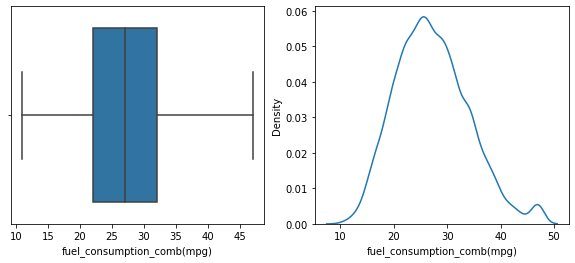

In [68]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_dataset['fuel_consumption_comb(mpg)'])
plt.subplot(1,2,2)
sns.distplot(emission_dataset['fuel_consumption_comb(mpg)'], hist=False)
plt.show()

#### For Features: co2_emissions

In [69]:
emission_data[['co2_emissions']].head()

,co2_emissions
0,196
1,221
2,136
3,255
4,244


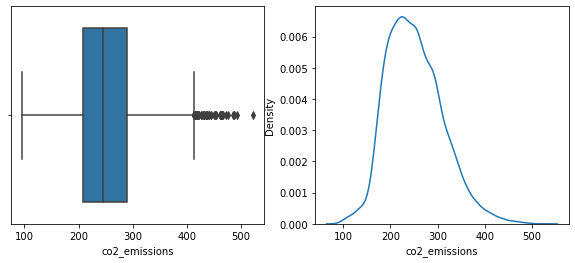

In [70]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_data['co2_emissions'])
plt.subplot(1,2,2)
sns.distplot(emission_data['co2_emissions'], hist=False)
plt.show()

### Detecting using Normal Distribuion and Treating using Z-Score

**Using Empirical rule of Normal distribution**

- The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers where mean and sigma are the average value and standard deviation of a particular feature.

In [71]:
# Finding mean and standard deviation
mean=emission_data['co2_emissions'].mean()
print('The mean of co2_emissions is:',mean)
std_dev=emission_data['co2_emissions'].std()
print('The standard deviation of co2_emissions is:',std_dev)

The mean of co2_emissions is: 251.7154322019729
The standard deviation of co2_emissions is: 59.178223625244115


In [72]:
# Finding the boundry values (3 sigma value)
high_allowed =mean + 3*std_dev
print('Highest allowed:', high_allowed)
low_allowed =mean - 3*std_dev
print('Lowest allowed:', low_allowed)

Highest allowed: 429.25010307770526
Lowest allowed: 74.18076132624057


#### Finding Outliers

In [73]:
outliers=emission_data[(emission_data['co2_emissions']>high_allowed) | (emission_data['co2_emissions']<low_allowed)]
outliers.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
75,bentley,mulsanne,mid-size,6.8,8,as,z,22.3,14.9,19.0,15,437
224,chevrolet,express 2500 passenger,van - passenger,6.0,8,a,x,21.9,15.0,18.8,15,432
227,chevrolet,express 3500 passenger,van - passenger,6.0,8,a,x,22.1,15.0,18.9,15,435
349,ford,e350 wagon,van - passenger,6.8,10,a,x,23.9,17.8,21.2,13,488
448,gmc,savana 2500 passenger,van - passenger,6.0,8,a,x,21.9,15.0,18.8,15,432


In [74]:
print('Total number of outliers are:',outliers['co2_emissions'].count())

Total number of outliers are: 41


#### Trimming

In [75]:
trimmed_data=emission_data[(emission_data['co2_emissions']<high_allowed) & (emission_data['co2_emissions']>low_allowed)]
trimmed_data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29,221
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,48,136
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25,255
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27,244


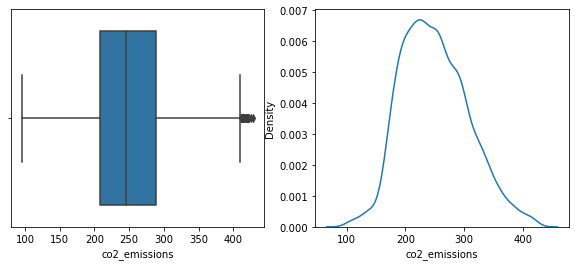

In [76]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(trimmed_data['co2_emissions'])
plt.subplot(1,2,2)
sns.distplot(trimmed_data['co2_emissions'], hist=False)
plt.show()

#### Caping/ Flooring

In [77]:
emission_dataset['co2_emissions'] = np.where(emission_dataset['co2_emissions'] > high_allowed,
                                      high_allowed,
                                      np.where(emission_dataset['co2_emissions'] < low_allowed,
                                               low_allowed,
                                               emission_dataset['co2_emissions']
                                              )
                                     )
emission_dataset.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33.0,196.0
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29.0,221.0
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,47.0,136.0
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25.0,255.0
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27.0,244.0


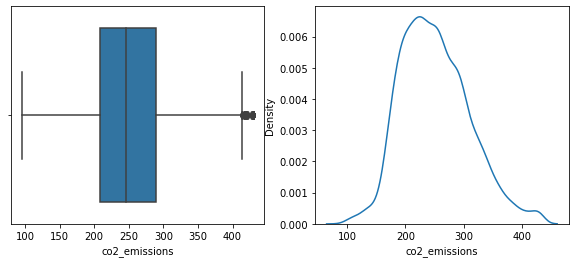

In [78]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(emission_dataset['co2_emissions'])
plt.subplot(1,2,2)
sns.distplot(emission_dataset['co2_emissions'], hist=False)
plt.show()

### Final Lookup

In [79]:
quantitative_features=emission_dataset.select_dtypes(exclude='object')
quantitative_features=quantitative_features.drop('cylinders', axis=1)
quantitative_features.head(6)

,engine_size,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,2.0,9.9,6.7,8.5,33.0,196.0
1,2.4,11.2,7.7,9.6,29.0,221.0
2,1.5,6.0,5.8,5.9,47.0,136.0
3,3.5,12.7,9.1,11.1,25.0,255.0
4,3.5,12.1,8.7,10.6,27.0,244.0
5,3.5,11.9,7.7,10.0,28.0,230.0


###### Box Plot and Distributuion plot

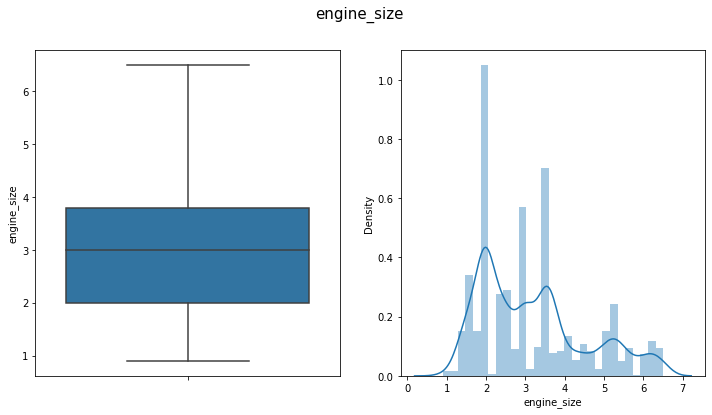

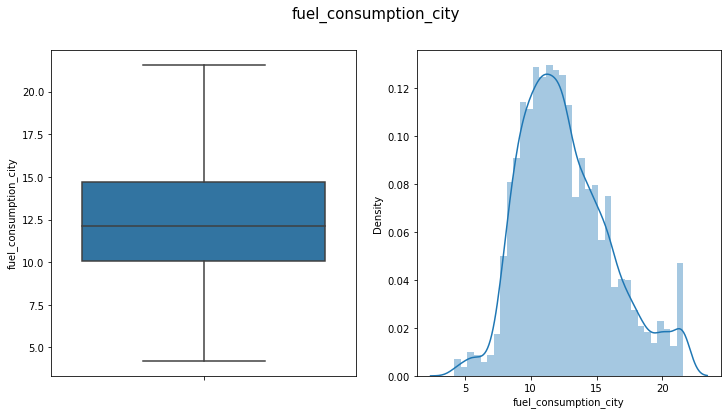

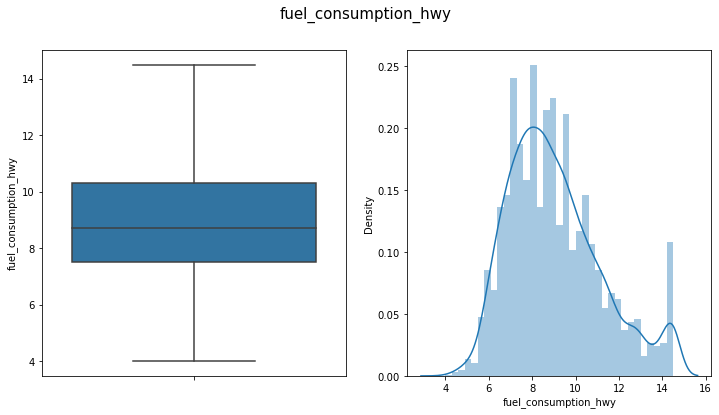

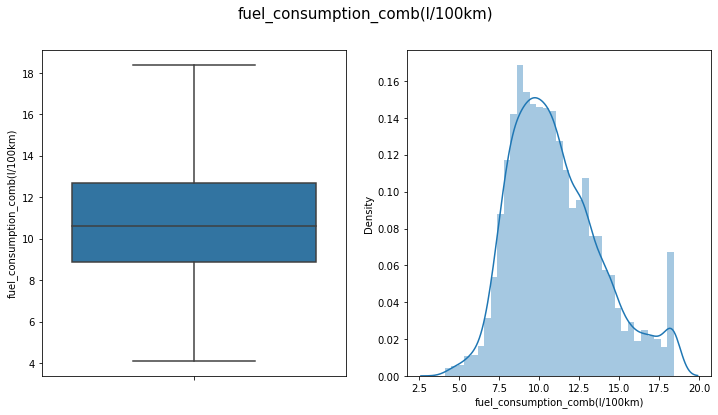

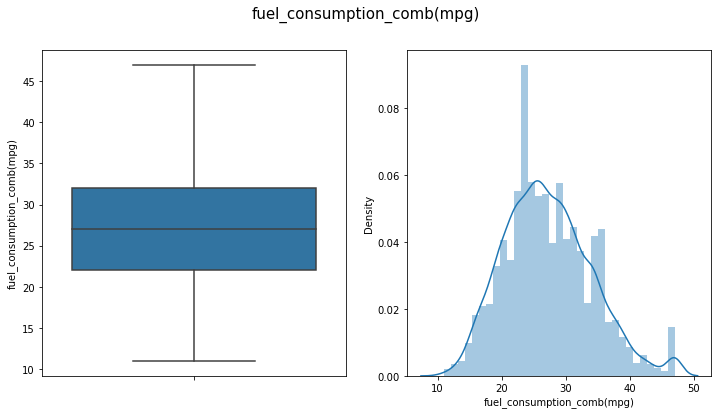

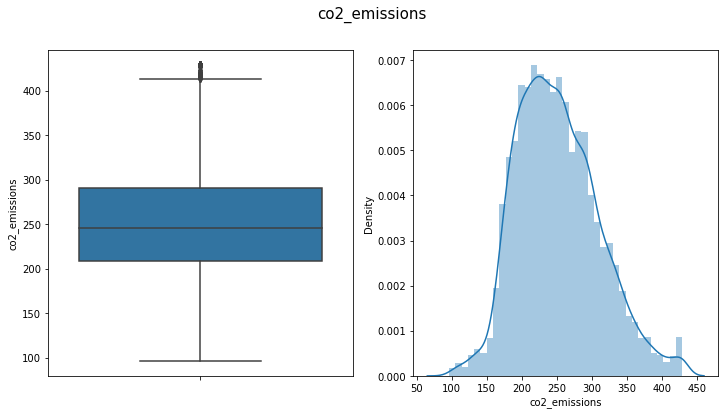

In [80]:
for i in quantitative_features:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.boxplot(y=i,data=emission_dataset)
    plt.subplot(1,2,2)
    sns.distplot(a=emission_dataset[i])
    plt.suptitle(i, size=15)
    plt.show()

## 5. Exporting Cleaned Data

In [81]:
emission_dataset.to_csv('Emission_dataset.csv',index=False)